# Project - Modeling Complex Genomic Associations


### Import Necessary Python Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

### Load 'data.csv' (the 'X' part of the dataset)

In [2]:
# Load tab-delimited text file into a DataFrame
df_x = pd.read_csv('Data/TCGA-PANCAN-HiSeq-801x20531/data.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_x.head()

First few rows of the DataFrame:


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


### Load 'labels.csv' (the 'y' part of the dataset)

In [3]:
# Load tab-delimited text file into a DataFrame
df_y = pd.read_csv('Data/TCGA-PANCAN-HiSeq-801x20531/labels.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_y.head()

First few rows of the DataFrame:


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [4]:
df = pd.merge(df_x, df_y)
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [5]:
df.shape

(801, 20533)

#### Drop the instance label column

In [6]:
df = df.drop(df.columns[0], axis=1)
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


## Basic Exploratory Analysis

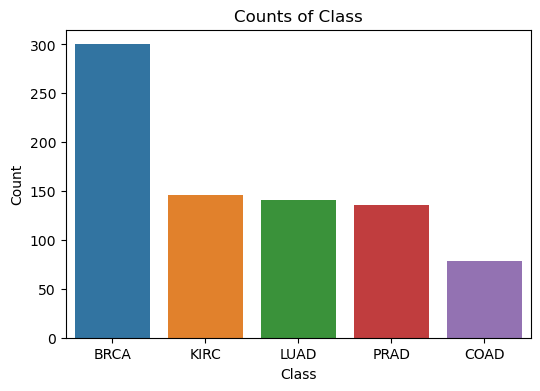

In [7]:
# Choose the column for which you want to plot the counts
column_name = 'Class'

# Get the value counts for the specified column
value_counts = df[column_name].value_counts()

# Plot the value counts using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title(f'Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [8]:
# Missing Value Assessment

# Group the DataFrame by the "class" column
grouped_df = df.groupby('Class')

# Calculate the sum of missing values in rows within each group
missing_values_per_class = grouped_df.apply(lambda x: x.isnull().sum().sum())

# Now 'missing_values_per_class' contains the sum of missing values for each class
print("Sum of missing values for each class:")
print(missing_values_per_class)

# Count missing values in dataset
total_missing_values = df.isna().sum().sum()

# Now 'total_missing_values' contains the total number of missing values in the DataFrame
print("Total number of missing values:", total_missing_values)

Sum of missing values for each class:
Class
BRCA    0
COAD    0
KIRC    0
LUAD    0
PRAD    0
dtype: int64
Total number of missing values: 0


### Cluster Analysis

C:\Users\ryanu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ryanu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


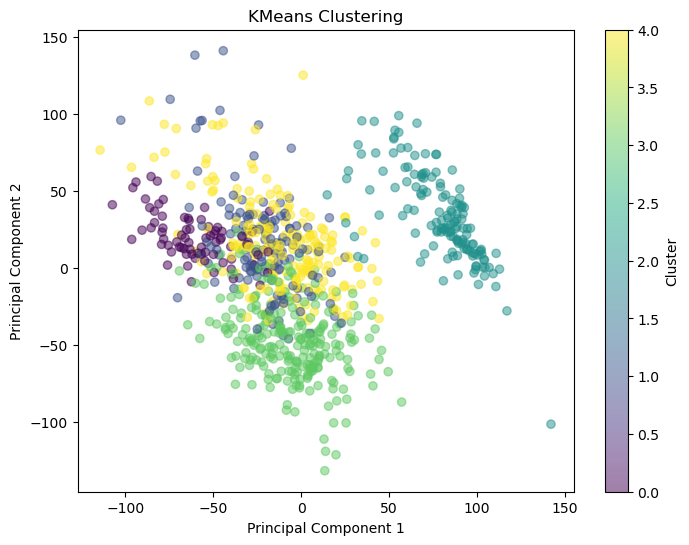

In [9]:
# Drop the class column for clustering
df_x = df.drop(columns=['Class'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_x)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

### Train and Evaluate Decision Tree Models (with 3-fold CV)

In [10]:
def train_model(model):
    # Split data into features and target
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    

    # Iterate over each fold of cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        

    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print summary of model performance
    print("Average Accuracy:", avg_accuracy)
    print("Average Balanced Accuracy:", avg_balanced_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)


In [11]:
# Train a decision tree model
model = DecisionTreeClassifier()
train_model(model)

Average Accuracy: 0.9563046192259675
Average Balanced Accuracy: 0.95323164314904
Average Precision: 0.9571450467802082
Average Recall: 0.9563046192259675
Average F1 Score: 0.9563808943578049


In [12]:
# Train a random forest model
model = RandomForestClassifier()
train_model(model)

Average Accuracy: 0.99625468164794
Average Balanced Accuracy: 0.9959148936170212
Average Precision: 0.9963155690596904
Average Recall: 0.99625468164794
Average F1 Score: 0.9962507141788416
